In [1]:
import pandas as pd

In [10]:
from fastai.vision.all import *

path = untar_data(URLs.CIFAR)
path

Path('/home/t1nnur/.fastai/data/cifar10')

In [19]:
from glob import glob

images = glob(f"{path}/train/*/*")
len(images), images[:10]

(50000,
 ['/home/t1nnur/.fastai/data/cifar10/train/deer/21364_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/33013_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/38930_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/25017_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/36914_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/15624_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/43563_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/7585_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/33703_deer.png',
  '/home/t1nnur/.fastai/data/cifar10/train/deer/9147_deer.png'])

In [ ]:
from pathlib import Path

df = pd.DataFrame({'path': images})
df


,path
0,/home/t1nnur/.fastai/data/cifar10/train/deer/21364_deer.png
1,/home/t1nnur/.fastai/data/cifar10/train/deer/33013_deer.png
2,/home/t1nnur/.fastai/data/cifar10/train/deer/38930_deer.png
3,/home/t1nnur/.fastai/data/cifar10/train/deer/25017_deer.png
4,/home/t1nnur/.fastai/data/cifar10/train/deer/36914_deer.png
...,...
49995,/home/t1nnur/.fastai/data/cifar10/train/truck/44564_truck.png
49996,/home/t1nnur/.fastai/data/cifar10/train/truck/6766_truck.png
49997,/home/t1nnur/.fastai/data/cifar10/train/truck/18557_truck.png
49998,/home/t1nnur/.fastai/data/cifar10/train/truck/41044_truck.png


In [31]:
def label(path: str):
    folders = path.split('/')
    return folders[-2]

df['label'] = df.path.map(label)

df

,path,label
0,/home/t1nnur/.fastai/data/cifar10/train/deer/21364_deer.png,deer
1,/home/t1nnur/.fastai/data/cifar10/train/deer/33013_deer.png,deer
2,/home/t1nnur/.fastai/data/cifar10/train/deer/38930_deer.png,deer
3,/home/t1nnur/.fastai/data/cifar10/train/deer/25017_deer.png,deer
4,/home/t1nnur/.fastai/data/cifar10/train/deer/36914_deer.png,deer
...,...,...
49995,/home/t1nnur/.fastai/data/cifar10/train/truck/44564_truck.png,truck
49996,/home/t1nnur/.fastai/data/cifar10/train/truck/6766_truck.png,truck
49997,/home/t1nnur/.fastai/data/cifar10/train/truck/18557_truck.png,truck
49998,/home/t1nnur/.fastai/data/cifar10/train/truck/41044_truck.png,truck


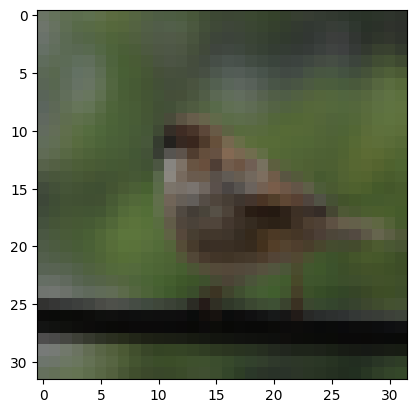

In [50]:
from matplotlib.pyplot import imread, imshow

img = imread(df.sample(1).iloc[0, 0])

imshow(img)

In [51]:
X = df.path.apply(lambda x: imread(x))
X

0        [[[0.36862746, 0.3647059, 0.38431373], [0.36862746, 0.3647059, 0.38431373], [0.3529412, 0.34901962, 0.36862746], [0.32941177, 0.3137255, 0.33333334], [0.30588236, 0.28627452, 0.30980393], [0.2509804, 0.23529412, 0.25882354], [0.2627451, 0.24313726, 0.27058825], [0.30588236, 0.2901961, 0.29411766], [0.3019608, 0.28627452, 0.28235295], [0.3019608, 0.28627452, 0.28235295], [0.28235295, 0.26666668, 0.26666668], [0.29411766, 0.27058825, 0.26666668], [0.31764707, 0.28627452, 0.28235295], [0.33333334, 0.30588236, 0.3019608], [0.32941177, 0.29803923, 0.29411766], [0.34901962, 0.32156864, 0.3215686...
1        [[[0.34117648, 0.44313726, 0.28627452], [0.36862746, 0.4745098, 0.3137255], [0.42745098, 0.5294118, 0.36862746], [0.40784314, 0.5019608, 0.34117648], [0.40392157, 0.49411765, 0.33333334], [0.42352942, 0.50980395, 0.34509805], [0.46666667, 0.5568628, 0.39215687], [0.43529412, 0.5176471, 0.36078432], [0.37254903, 0.4509804, 0.3019608], [0.32156864, 0.39215687, 0.2509804], [0.317647

In [53]:
y = df.label
y

0         deer
1         deer
2         deer
3         deer
4         deer
         ...  
49995    truck
49996    truck
49997    truck
49998    truck
49999    truck
Name: path, Length: 50000, dtype: object